# Lab 6: Statistical Inference
## Name
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

# Exercise 1

The births dataset is a random sample of 100 births for babies in North Carolina where the mother was not a smoker and another 50 where the mother was a smoker. We are going to perform a variety of statistical tests using this dataset. Load the dataset and classify the different variables recorded in the study.

---

Type your response here.

In [2]:
births = pd.read_csv("births.csv", na_values='NaN')

births

,Unnamed: 0,f_age,m_age,weeks,premature,visits,gained,weight,sex_baby,smoke
0,1,31.0,30,39,full term,13.0,1.0,6.88,male,smoker
1,2,34.0,36,39,full term,5.0,35.0,7.69,male,nonsmoker
2,3,36.0,35,40,full term,12.0,29.0,8.88,male,nonsmoker
3,4,41.0,40,40,full term,13.0,30.0,9.00,female,nonsmoker
4,5,42.0,37,40,full term,NaN,10.0,7.94,male,nonsmoker
...,...,...,...,...,...,...,...,...,...,...
145,146,NaN,17,40,full term,15.0,20.0,7.63,female,nonsmoker
146,147,NaN,37,39,full term,5.0,20.0,8.19,female,smoker
147,148,31.0,32,37,full term,12.0,22.0,6.00,female,nonsmoker
148,149,33.0,28,41,full term,10.0,30.0,8.13,male,nonsmoker


# Exercise 2

Construct a confidence interval to estimate the percent of babies that will be full term from non-smoking mothers. Interpret your results.

---

Type your response here.

The observed proportion of full term births from non-smoking mothers is 0.87


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
UsageError: Line magic function `%print("The` not found.


The 95% confidence interval from bootstrapping is: [ 0.81 , 0.92 ]


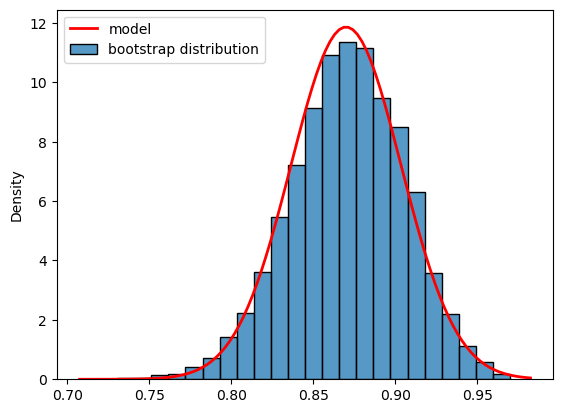

In [3]:
nonsmoker_births = births[births.smoke == "nonsmoker"]
p_fullterm = nonsmoker_births['premature'].value_counts(normalize=True)['full term']

print("The observed proportion of full term births from non-smoking mothers is", p_fullterm)

bootstrap_dist_nonsmoker = []

for x in range(10000):
    simulated_nonsmoker_births = pd.DataFrame().assign(premature=nonsmoker_births['premature'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_nonsmoker.append(simulated_nonsmoker_births['premature'].value_counts(normalize=True)['full term'])

bootstrap_dist_nonsmoker.sort()
ax = sns.histplot(data=bootstrap_dist_nonsmoker, bins=24, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=p_fullterm, scale=((p_fullterm * (1 - p_fullterm))/len(nonsmoker_births))**0.5)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_nonsmoker[int(0.05*len(bootstrap_dist_nonsmoker))], ",", bootstrap_dist_nonsmoker[int(0.95*len(bootstrap_dist_nonsmoker))], "]")
%print("The 95% confidence interval from the model is:", st.norm.interval(confidence=0.95, loc=p_fullterm, scale=((p_fullterm * (1 - p_fullterm))/len(nonsmoker_births))**0.5))

# Exercise 3

Conduct a hypothesis test comparing the percent of full term babies between nonsmokers and smokers. Be sure to include a confidence interval and interpret your results.

---

Type your response here.

In [ ]:
p_smoker = births.groupby('smoke')['premature'].value_counts(normalize=True)[('smoker','full term')]
p_nonsmoker = births.groupby('smoke')['premature'].value_counts(normalize=True)[('nonsmoker','full term')]
p_difference = p_nonsmoker - p_smoker

print("The difference in proportion of fullterm births between smokers and non-smokers is ", p_difference)

sim_fullterm_difference = []

for x in range(1000):
    sim_fullterm = pd.DataFrame().assign(smoke=births['smoke'], premature=births['premature'].sample(frac=1, ignore_index=True))
    sim_fullterm_difference.append(sim_fullterm.groupby('smoke')['premature'].value_counts(normalize=True)[('nonsmoker','full term')] - sim_fullterm.groupby('smoke')['premature'].value_counts(normalize=True)[('smoker','full term')])

ax = sns.histplot(data=sim_fullterm_difference, bins=12, label="simulated distribution", stat='density')
ax.axvline(x = p_difference, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

n_smoker = births['smoke'].value_counts()[('smoker')]
n_nonsmoker = births['smoke'].value_counts()[('nonsmoker')]
p_pool = (p_smoker * n_smoker + p_nonsmoker * n_nonsmoker)/(n_smoker + n_nonsmoker)

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=0, scale=(p_pool * (1 - p_pool) * ((1 / n_smoker) + (1 / n_nonsmoker)))**0.5)

ax.plot(x_pdf, y_pdf, 'red', lw=2, label='model')                                                   
ax.legend()

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_fullterm_difference if i > p_difference]) / len(sim_fullterm_difference))

In [ ]:
bootstrap_difference_dist = []

smoker_births = births[births.smoke == "smoker"]

for x in range(10000):
    sim_smoker_births = pd.DataFrame().assign(premature=smoker_births['premature'].sample(frac=1, replace=True, ignore_index=True))
    sim_nonsmoker_births = pd.DataFrame().assign(premature=nonsmoker_births['premature'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_difference_dist.append(sim_nonsmoker_births['premature'].value_counts(normalize=True)['full term'] - sim_smoker_births['premature'].value_counts(normalize=True)['full term'])

bootstrap_difference_dist.sort()
ax = sns.histplot(data=bootstrap_difference_dist, bins=24, label='bootstrap distribution', stat='density')
print("The 95% confidence interval from bootstrapping is: [", bootstrap_difference_dist[int(0.05*len(bootstrap_difference_dist))], ",", bootstrap_difference_dist[int(0.95*len(bootstrap_difference_dist))], "]")

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=p_difference, scale=((((p_smoker *(1 - p_smoker))/n_smoker) + ((p_nonsmoker * (1 - p_nonsmoker))/n_nonsmoker))**0.5))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

# Exercise 4

Construct a confidence interval to estimate the average weight of babies from smoking mothers. Interpret your results.

---

Type your response here.

In [ ]:
ave_weight_smoker = smoker_births['weight'].mean()
print("The observed average weight of babies from smoking mothers is", ave_weight_smoker, "pounds.")

bootstrap_dist_weight = []

for x in range(10000):
    simulated_smoker_weight = pd.DataFrame().assign(weight=smoker_births['weight'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_weight.append(simulated_smoker_weight['weight'].mean())

bootstrap_dist_weight.sort()
ax = sns.histplot(data=bootstrap_dist_weight, bins=24, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=n_smoker-1, loc=ave_weight_smoker, scale=smoker_births['weight'].std()/(n_smoker)**0.5)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_weight[int(0.05*len(bootstrap_dist_weight))], ",", bootstrap_dist_weight[int(0.95*len(bootstrap_dist_weight))], "]")

# Exercise 5

We wish to compare the average age of fathers and mothers to see if there is a difference. Conduct a hypothesis test comparing the average ages. Be sure to include a confidence interval and interpret your results.

---

Type your response here.